### 3

Q shape (401, 5)
R shape (5, 5)


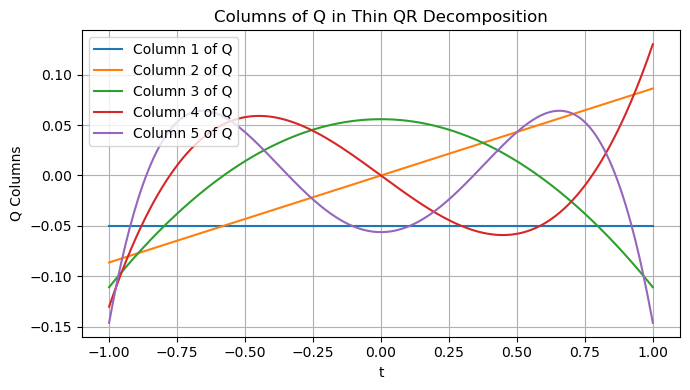

In [1]:
import numpy as np
import matplotlib.pyplot as plt

m = 400
t = np.linspace(-1, 1, m+1)

n = 5
A = np.vander(t, n, increasing=True)

# QR factorization
Q, R = np.linalg.qr(A)
print("Q shape", Q.shape)
print("R shape", R.shape)

# Plot each column of Q as a function of t
plt.figure(figsize=(7, 4))
for i in range(Q.shape[1]):
    plt.plot(t, Q[:, i], label=f"Column {i+1} of Q")

plt.xlabel('t')
plt.ylabel('Q Columns')
plt.title('Columns of Q in Thin QR Decomposition')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


### 7

In [2]:
"""
To import functions of textbook from `fnc.py`, 
we need to add the path of `fnc.py` to the system path
"""
import sys
sys.path.append('../')
from fnc import lsqrfact

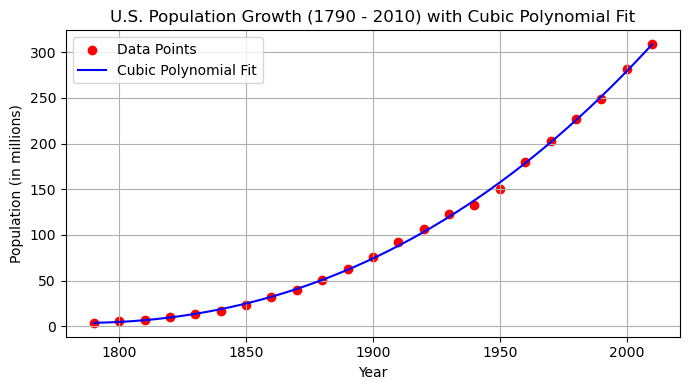

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Data from the census (years from 1790 to 2010 with population in millions)
years = np.linspace(1790, 2010, 23)

population = np.array(
    [3.929, 5.308, 7.240, 9.638, 12.87, 17.07, 23.19, 31.44, 
     39.82, 50.19, 62.95, 76.21, 92.22, 106.0, 122.8, 132.2, 
     150.7, 179.3, 203.3, 226.5, 248.7, 281.4, 308.7]
)

# (a) Fit a cubic polynomial to the data
A = np.stack([np.ones_like(years), years, years**2, years**3], axis=1)
# coeff = np.linalg.lstsq(A, population, rcond=None)[0]  # Fit a cubic polynomial (degree=3)
coeff = lsqrfact(A, population)

# Generate smooth values for plotting the cubic fit
def cubic_polynomial(x, coeff):
    c_1, c_2, c_3, c_4 = coeff
    return c_1 + c_2 * x + c_3 * x**2 + c_4 * x**3
years_smooth = np.linspace(1790, 2010, 500)
population_smooth = cubic_polynomial(years_smooth, coeff)

# Plot the data points and the cubic polynomial curve
plt.figure(figsize=(7, 4))
plt.scatter(years, population, color='red', label='Data Points')  # Actual census data
plt.plot(years_smooth, population_smooth, label='Cubic Polynomial Fit', color='blue')
plt.xlabel('Year')
plt.ylabel('Population (in millions)')
plt.title('U.S. Population Growth (1790 - 2010) with Cubic Polynomial Fit')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
